# ДЗ 4 Тема “Обучение без учителя”

№ Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

Создайте датафреймы X и y из этих данных.

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

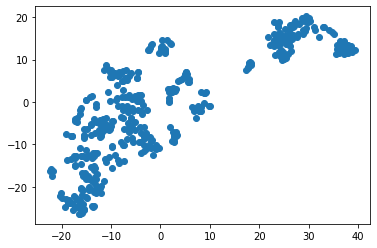

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [41]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

train_labels = model.fit_predict(X_train_scaled)

print(train_labels)

[1 2 0 1 2 0 0 0 1 1 0 2 2 1 2 2 2 0 0 0 1 2 0 0 0 2 2 0 2 0 2 2 2 1 0 0 0
 2 2 0 0 2 1 2 2 1 2 2 1 1 0 2 0 0 1 1 0 1 2 0 2 0 2 2 2 1 2 2 2 2 0 2 1 2
 2 0 0 0 2 1 1 1 0 2 1 2 1 0 1 2 2 1 1 0 0 2 1 2 0 2 2 0 0 0 2 2 0 2 0 2 1
 0 2 0 0 1 1 1 0 2 2 1 1 2 0 2 1 0 0 1 0 2 0 2 2 1 2 0 2 2 2 1 2 2 2 1 2 0
 0 2 2 1 0 0 0 1 2 1 2 1 0 2 1 2 2 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 0 2 1 2 2
 1 0 0 1 1 1 2 0 1 1 2 0 2 0 0 1 1 2 2 2 2 0 2 2 2 2 0 2 1 0 2 0 1 2 1 1 2
 1 0 2 0 0 0 0 0 1 2 0 2 2 2 2 1 0 2 0 0 0 1 1 2 0 1 1 2 0 0 1 0 0 1 2 2 1
 0 1 2 0 0 0 2 2 2 2 0 0 1 2 1 2 2 0 2 1 2 0 2 2 1 2 0 1 0 0 2 2 0 1 1 1 2
 0 1 2 0 2 2 2 0 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 0 1 0 0 2 1 2 1
 1 2 0 1 0 0 2 0 2 2 2 1 0 2 0 2 2 0 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 0 1 0 2 2 2 2 2 1 0 1 0 1 0 0 1 2 2 2 0 0 2 0 0 1 2]


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

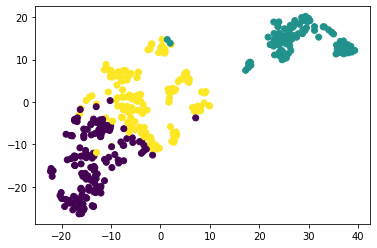

In [43]:
#centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
#plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [46]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521


Вычислите средние значения price и CRIM в разных кластерах.

In [88]:
print('CRIM Кластер 0: {}'.format(round(X_train.loc[train_labels == 0, 'CRIM'].mean())))
print('CRIM Кластер 1: {}'.format(round(X_train.loc[train_labels == 1, 'CRIM'].mean())))
print('CRIM Кластер 2: {}'.format(round(X_train.loc[train_labels == 2, 'CRIM'].mean())))

CRIM Кластер 0: 0
CRIM Кластер 1: 13
CRIM Кластер 2: 1


In [87]:
print('Price Кластер 0: {}'.format(round(y_train[train_labels == 0].mean())))
print('Price Кластер 1: {}'.format(round(y_train[train_labels == 1].mean())))
print('Price Кластер 2: {}'.format(round(y_train[train_labels == 2].mean())))

Price Кластер 0: 27.0
Price Кластер 1: 16.0
Price Кластер 2: 23.0


# Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [77]:
test_labels = model.fit_predict(X_test)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [86]:
print('CRIM Кластер 0: {}'.format(round(X_test.loc[test_labels == 0, 'CRIM'].mean())))
print('CRIM Кластер 1: {}'.format(round(X_test.loc[test_labels == 1, 'CRIM'].mean())))
print('CRIM Кластер 2: {}'.format(round(X_test.loc[test_labels == 2, 'CRIM'].mean())))

CRIM Кластер 0: 19
CRIM Кластер 1: 0
CRIM Кластер 2: 8


In [85]:
print('Price Кластер 0: {}'.format(round(y_test[test_labels == 0].mean())))
print('Price Кластер 1: {}'.format(round(y_test[test_labels == 1].mean())))
print('Price Кластер 2: {}'.format(round(y_test[test_labels == 2].mean())))

Price Кластер 0: 13.0
Price Кластер 1: 24.0
Price Кластер 2: 17.0
